In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nrclex import NRCLex
import numpy as np
import nltk

sns.set(style='darkgrid')

# Post Frequency by Week

In [13]:
months = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
freq = [pd.read_csv(f'raw_data/{month}{i}.csv').shape[0] for month in months for i in range(1, 3)]

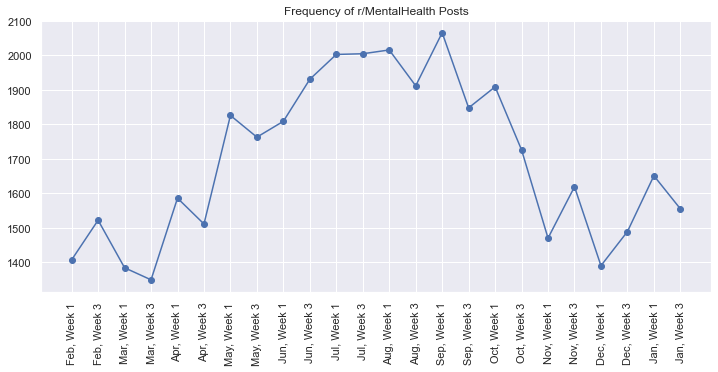

In [14]:
plt.figure(figsize=(12, 5))
plt.title('Frequency of r/MentalHealth Posts')
plt.xticks(rotation=90)
plt.plot([f'{month}, Week {i}' for month in months for i in range(1, 4, 2)], freq, 'o-')

In [31]:
#more EDA using emotion data package NRCLex
file_names = ['Feb1', 'Feb2', 'Mar1', 'Mar2', 'Apr1', 'Apr2', 'May1', 'May2', 'Jun1', 'Jun2', 'Jul1', 'Jul2',
                 'Aug1', 'Aug2', 'Sep1', 'Sep2', 'Oct1', 'Oct2', 'Nov1', 'Nov2', 'Dec1', 'Dec2', 'Jan1', 'Jan2']
data = []

features = {'anger': 0, 'anticipation': 1, 'disgust': 2, 'fear': 3, 'joy': 4, 'sadness': 5,
            'surprise': 6, 'trust': 7, 'negative': 8, 'positive': 9}

for file_name in file_names:
    file_name = pd.read_csv(f'raw_data/{file_name}.csv')
    file_name['text'] = file_name['text'].astype(str)
    data.append(file_name)

emotion_by_month = np.zeros((len(data),10))
for i in range(0,len(data)):
    titles = data[i]['title']
    texts = data[i]['text']
    num_tokens_per_month = 0
    for j in titles:
        tokens = nltk.word_tokenize(j.lower())
        num_tokens_per_month += len(tokens)
        emotion = NRCLex(j.lower())
        emotion_dict = emotion.raw_emotion_scores
        for key in emotion_dict:
            col = features[key]
            count = emotion_dict[key]
            emotion_by_month[i,col] += count
    #normalize frequency of each emotion (over the 1 week period) by number of tokens (over the 1 week period)
    emotion_by_month[i,:] = (emotion_by_month[i,:]/num_tokens_per_month)
            
df = pd.DataFrame(emotion_by_month, columns = ['anger','anticipation','disgust','fear','joy','sadness','surprise',
                                              'trust','negative','positive'], index = file_names)
print(df)


         anger  anticipation   disgust      fear       joy   sadness  \
Feb1  0.029708      0.023328  0.017770  0.039451  0.015780  0.042950   
Feb2  0.028509      0.023587  0.017898  0.037395  0.017515  0.040335   
Mar1  0.031375      0.026171  0.020446  0.041710  0.018513  0.040669   
Mar2  0.030549      0.024080  0.017898  0.038887  0.018833  0.042050   
Apr1  0.027527      0.021686  0.016777  0.039520  0.016032  0.039582   
Apr2  0.028000      0.021982  0.018482  0.038070  0.017684  0.037885   
May1  0.027422      0.023377  0.015812  0.035512  0.017441  0.036877   
May2  0.029623      0.023777  0.016751  0.037437  0.016863  0.041484   
Jun1  0.030830      0.023505  0.018814  0.039473  0.016864  0.040422   
Jun2  0.027212      0.023361  0.017919  0.038404  0.016430  0.038764   
Jul1  0.027418      0.025176  0.017452  0.038861  0.017976  0.039720   
Jul2  0.029508      0.025183  0.018358  0.035371  0.019319  0.038351   
Aug1  0.027627      0.023123  0.017598  0.037981  0.017412  0.03

<AxesSubplot:>

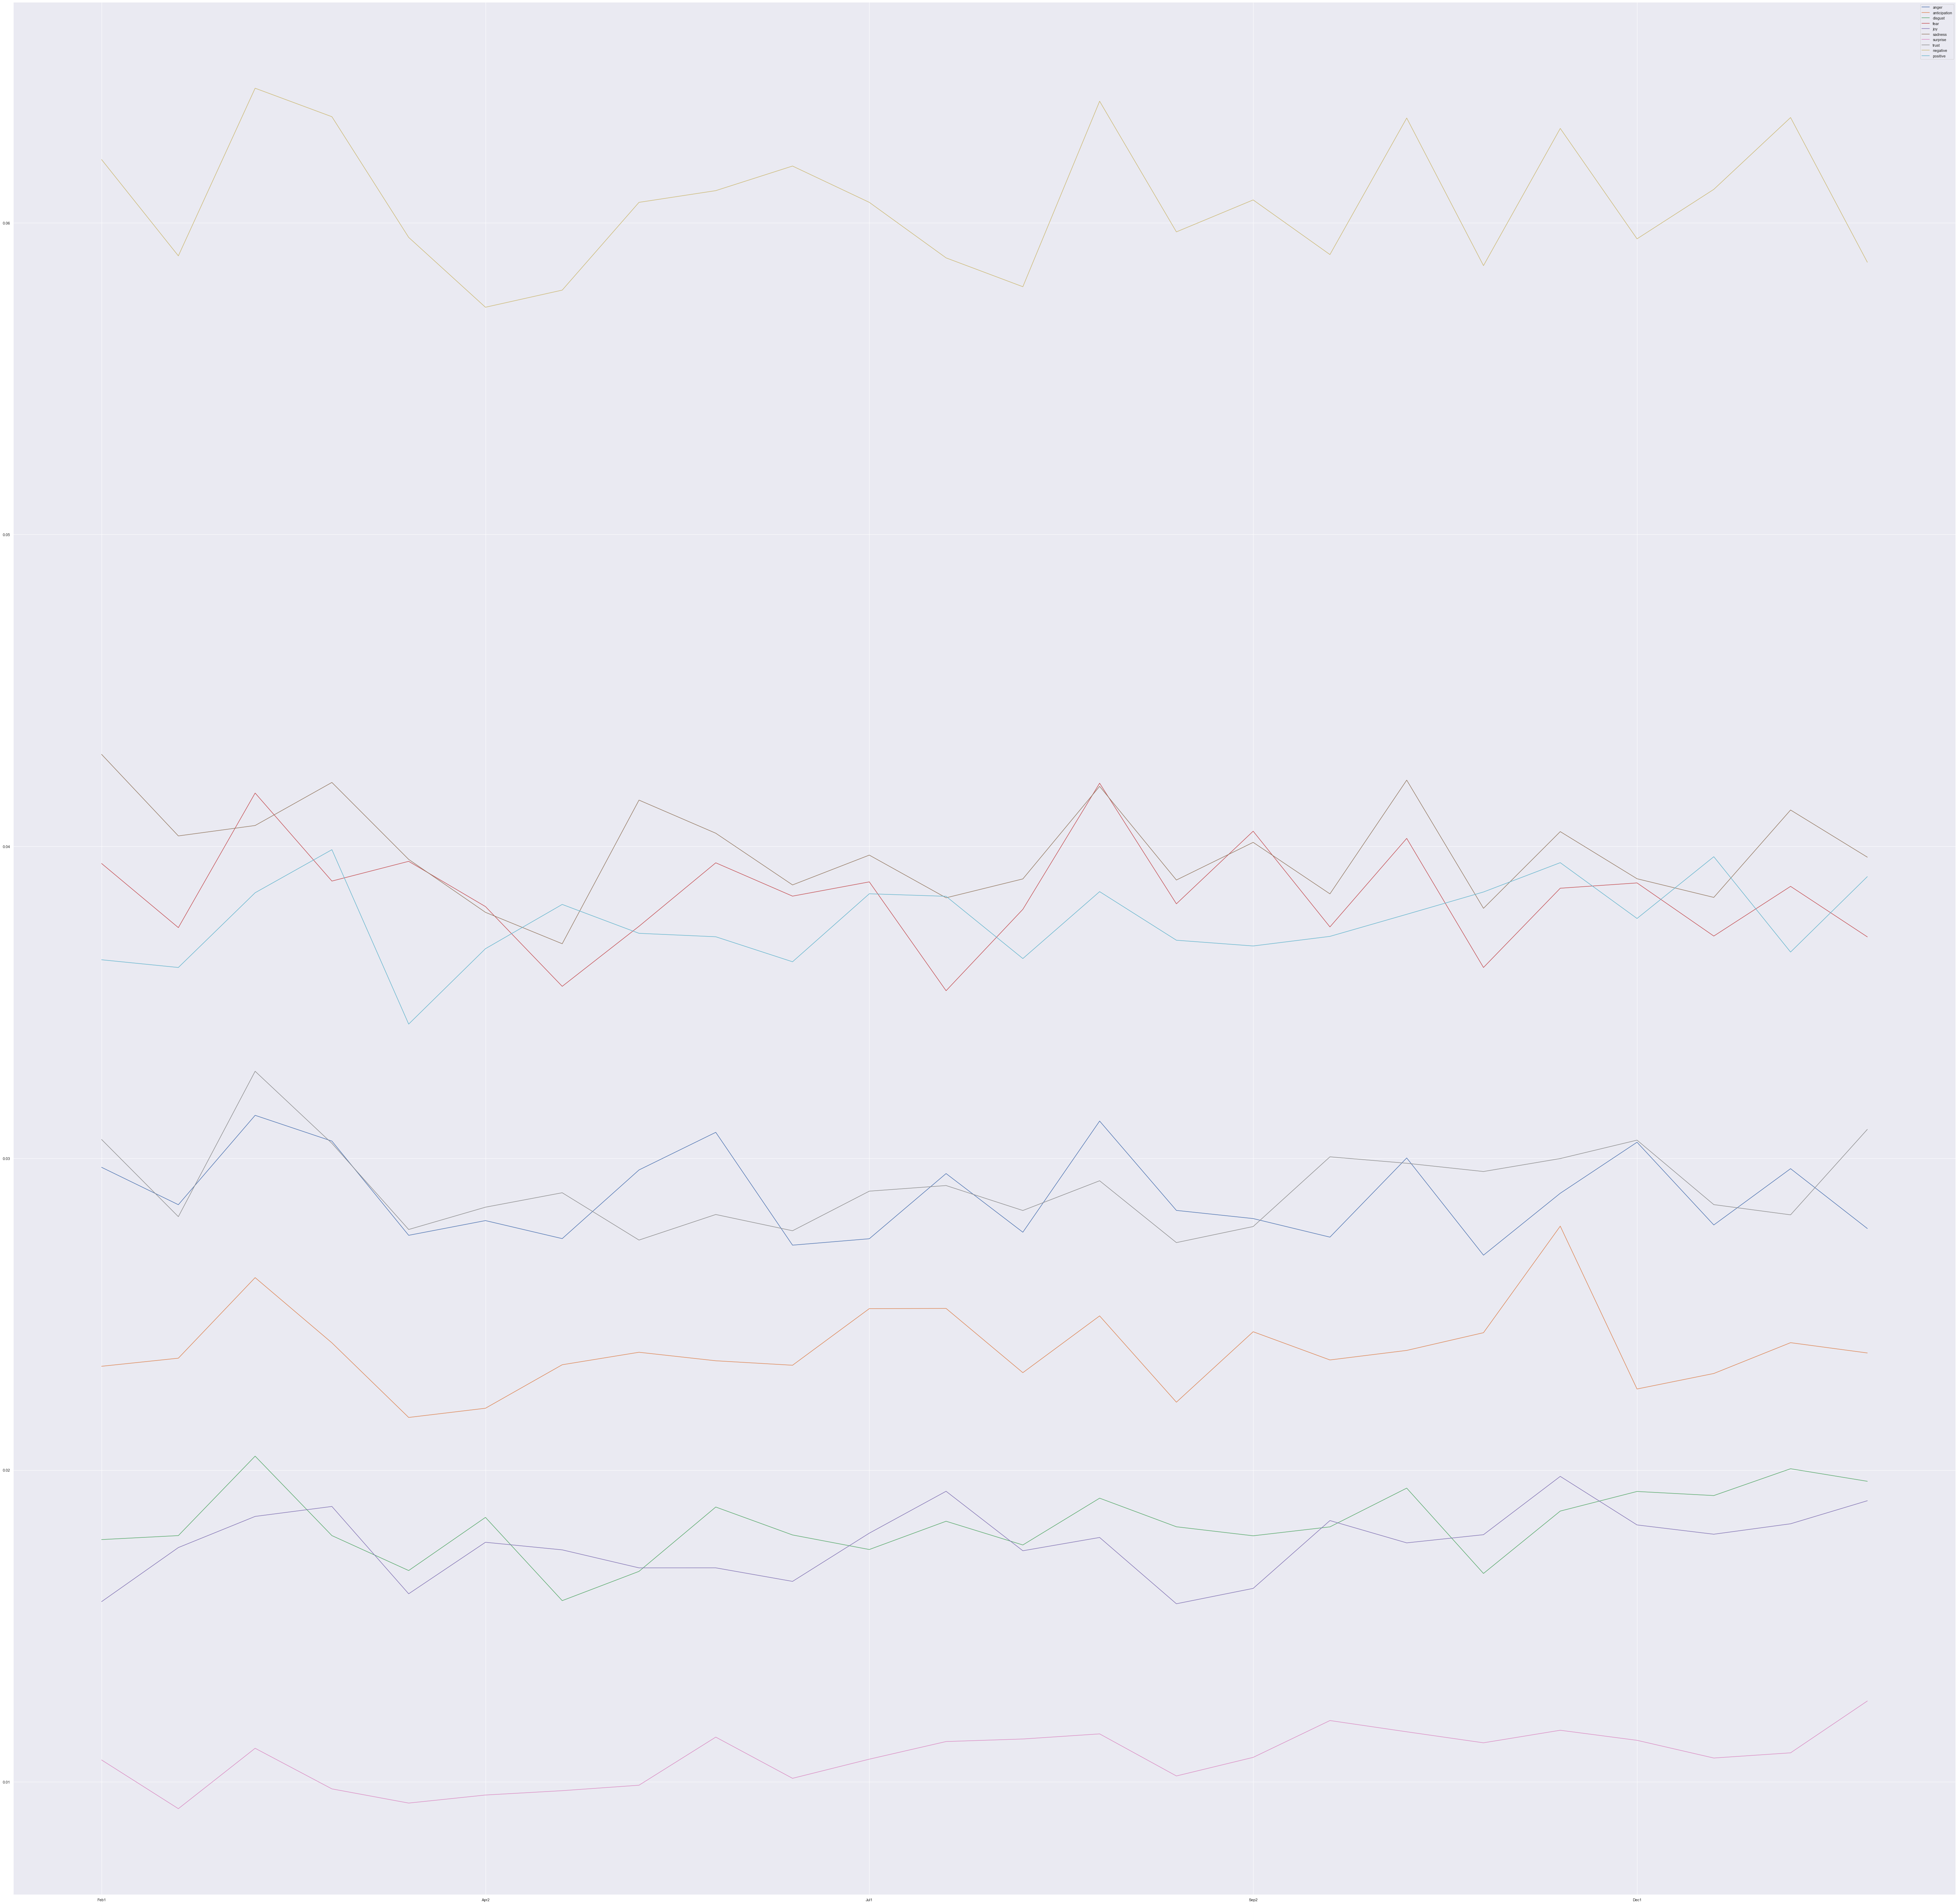

In [41]:
df.plot(kind="line", figsize=(100,100))